In [1]:
!pip install ultralytics pyyaml matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.8 MB/s eta 0:00:00


In [2]:
import os
import yaml
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

import zipfile

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!unzip -q "/content/drive/My Drive/Hackathon_Dataset.zip" -d /content


In [5]:
zip_path = '/content/drive/My Drive/Hackathon_Dataset.zip'  # Change if needed
extract_path = '/content'

In [6]:

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [7]:
!ls /content/HackByte_Dataset

classes.txt  ENV_SETUP	 train.py      yolo_params.yaml
data	     predict.py  visualize.py


In [13]:
dataset_yaml = """
train: /content/HackByte_Dataset/data/train/images
val: /content/HackByte_Dataset/data/val/images
test: /content/HackByte_Dataset/data/test/images

nc: 3
names: ["FireExtinguisher", "ToolBox", "OxygenTank"]
"""

with open("yolo_params.yaml", "w") as f:
    f.write(dataset_yaml)

In [14]:
training_config = {
    'model': {
        'architecture': 'yolov8n',
        'pretrained': True
    },
    'training': {
        'epochs': 50,
        'batch_size': 16,
        'learning_rate': 0.01,
        'optimizer': 'SGD',
        'momentum': 0.937,
        'weight_decay': 0.0005,
        'patience': 20,
        'warmup_epochs': 3,
        'augmentation': {
            'hsv_h': 0.015,
            'hsv_s': 0.7,
            'hsv_v': 0.4,
            'degrees': 0.0,
            'translate': 0.1,
            'scale': 0.5,
            'shear': 0.0,
            'perspective': 0.0,
            'flipud': 0.0,
            'fliplr': 0.5,
            'mosaic': 1.0,
            'mixup': 0.0,
            'copy_paste': 0.0
        }
    },
    'validation': {
        'conf_threshold': 0.001,
        'iou_threshold': 0.6,
        'max_det': 300
    }
}


In [15]:
import yaml
with open("config.yaml", "w") as f:
    yaml.dump(training_config, f)

In [16]:
from ultralytics import YOLO
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Using device: {device}")

# Load config
with open("config.yaml") as f:
    config = yaml.safe_load(f)

train_params = {
    "data": "yolo_params.yaml",
    "epochs": config['training']['epochs'],
    "batch": config['training']['batch_size'],
    "imgsz": 640,
    "lr0": config['training']['learning_rate'],
    "optimizer": config['training']['optimizer'],
    "momentum": config['training']['momentum'],
    "weight_decay": config['training']['weight_decay'],
    "patience": config['training']['patience'],
    "warmup_epochs": config['training']['warmup_epochs'],
    "cos_lr": True,
    "device": device,
    "project": "runs/train",
    "name": "industrial_safety_colab",
    "val": True,
    "plots": True,
    "save": True,
    "conf": config['validation']['conf_threshold'],
    "iou": config['validation']['iou_threshold'],
    "max_det": config['validation']['max_det']
}

train_params.update(config['training']['augmentation'])

# Load model and start training
model = YOLO(f"{config['model']['architecture']}.pt")
results = model.train(**train_params)


✅ Using device: cuda
Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.001, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=yolo_params.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.6, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=industrial_safety_colab3, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=20, perspective=0.0, plots=True

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 713.9±730.2 MB/s, size: 2900.0 KB)


train: Scanning /content/HackByte_Dataset/data/train/labels... 846 images, 5 backgrounds, 0 corrupt: 100%|██████████| 846/846 [00:10<00:00, 79.10it/s] 


train: New cache created: /content/HackByte_Dataset/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1551.9±847.0 MB/s, size: 3015.9 KB)


val: Scanning /content/HackByte_Dataset/data/val/labels... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:01<00:00, 127.05it/s]

val: New cache created: /content/HackByte_Dataset/data/val/labels.cache


Plotting labels to runs/train/industrial_safety_colab3/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/industrial_safety_colab3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.01G     0.9924       3.34      1.108         28        640: 100%|██████████| 53/53 [00:49<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        154        206      0.886     0.0788      0.406      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.12G     0.9329      2.028      1.053         49        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        154        206      0.779      0.545      0.651      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.13G      1.006      1.651      1.079         45        640: 100%|██████████| 53/53 [00:48<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]

                   all        154        206      0.567      0.618      0.616      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.14G      1.041      1.545      1.102         30        640: 100%|██████████| 53/53 [00:48<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        154        206      0.707      0.389       0.45      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.15G      1.038       1.45      1.106         33        640: 100%|██████████| 53/53 [00:47<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        154        206       0.64      0.506      0.507      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.16G      1.043      1.345       1.11         39        640: 100%|██████████| 53/53 [00:48<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        154        206      0.829      0.655       0.73      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G      1.055       1.31      1.126         37        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        154        206      0.872      0.651      0.705      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.19G      1.003      1.195      1.096         28        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        154        206      0.882      0.718       0.75      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.2G     0.9673      1.103      1.076         24        640: 100%|██████████| 53/53 [00:49<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        154        206       0.87      0.639       0.69      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.21G     0.9794      1.125        1.1         24        640: 100%|██████████| 53/53 [00:48<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]

                   all        154        206      0.758      0.608      0.673      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.22G     0.9449      1.033      1.076         31        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]

                   all        154        206      0.908      0.766      0.832       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.23G     0.9128     0.9661      1.056         40        640: 100%|██████████| 53/53 [00:50<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

                   all        154        206      0.845       0.74      0.796      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.24G     0.8999      0.915      1.045         38        640: 100%|██████████| 53/53 [00:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

                   all        154        206      0.828      0.577      0.657      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.25G     0.8866     0.9008      1.042         33        640: 100%|██████████| 53/53 [00:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        154        206      0.925      0.768      0.853      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.27G     0.8726     0.8891      1.034         36        640: 100%|██████████| 53/53 [00:49<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        154        206      0.946      0.769      0.839      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.28G     0.8515     0.8374      1.026         24        640: 100%|██████████| 53/53 [00:48<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        154        206      0.909      0.731      0.822      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.29G     0.8493     0.8216      1.019         29        640: 100%|██████████| 53/53 [00:50<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        154        206      0.932      0.787      0.854      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.3G     0.8092     0.7844      1.009         40        640: 100%|██████████| 53/53 [00:50<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        154        206      0.907      0.781      0.841      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.31G     0.7925     0.7658      1.006         32        640: 100%|██████████| 53/53 [00:51<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        154        206      0.959      0.826      0.878       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G     0.7924     0.7563      1.008         40        640: 100%|██████████| 53/53 [00:50<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        154        206      0.959      0.825      0.873       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.34G     0.7489     0.6986     0.9836         47        640: 100%|██████████| 53/53 [00:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]

                   all        154        206      0.938      0.805      0.868      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.35G     0.7413     0.6851     0.9891         40        640: 100%|██████████| 53/53 [00:48<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]

                   all        154        206       0.95      0.802      0.867       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.36G     0.7621     0.7066      0.992         34        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]

                   all        154        206      0.861      0.766      0.807       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.37G     0.7151     0.6507     0.9664         34        640: 100%|██████████| 53/53 [00:48<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]

                   all        154        206      0.975      0.803      0.889      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.38G     0.7363     0.6752     0.9819         35        640: 100%|██████████| 53/53 [00:48<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        154        206      0.938      0.775      0.859      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.39G     0.6859     0.6358     0.9671         48        640: 100%|██████████| 53/53 [00:51<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        154        206      0.966      0.838      0.887       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.4G      0.683     0.6104     0.9597         40        640: 100%|██████████| 53/53 [00:50<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        154        206      0.944      0.858      0.907      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.41G     0.6567     0.5999     0.9499         25        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        154        206      0.968       0.83      0.903      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.43G     0.6541     0.5769     0.9404         43        640: 100%|██████████| 53/53 [00:49<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        154        206      0.949      0.854      0.898      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.44G     0.6289     0.5776     0.9487         25        640: 100%|██████████| 53/53 [00:51<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        154        206      0.953      0.858       0.91      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.45G     0.6327     0.5686     0.9422         40        640: 100%|██████████| 53/53 [00:48<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]

                   all        154        206      0.959      0.854      0.904      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.46G     0.6262     0.5636     0.9423         38        640: 100%|██████████| 53/53 [00:49<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]

                   all        154        206      0.958      0.863      0.903      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.47G     0.5911     0.5259     0.9244         29        640: 100%|██████████| 53/53 [00:48<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        154        206      0.976      0.874      0.923      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.48G     0.5963     0.5251     0.9215         36        640: 100%|██████████| 53/53 [00:50<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        154        206       0.97      0.872      0.913      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.49G     0.5824     0.5285     0.9213         39        640: 100%|██████████| 53/53 [00:49<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        154        206      0.972      0.829      0.895      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.51G     0.5618     0.5108     0.9111         46        640: 100%|██████████| 53/53 [00:48<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        154        206      0.967      0.868      0.914      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.52G     0.5687     0.4947      0.921         33        640: 100%|██████████| 53/53 [00:49<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        154        206      0.976      0.863      0.919      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.53G     0.5592     0.4776      0.925         28        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        154        206      0.946      0.868      0.913      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.54G     0.5475     0.4805     0.9065         34        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        154        206      0.955      0.872      0.917      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.55G     0.5282     0.4647     0.9071         28        640: 100%|██████████| 53/53 [00:48<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

                   all        154        206      0.975      0.855       0.92      0.821


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.56G     0.4252     0.4211     0.8258         19        640: 100%|██████████| 53/53 [00:55<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        154        206      0.964      0.884      0.924      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.57G     0.4182     0.4039      0.826         18        640: 100%|██████████| 53/53 [00:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        154        206      0.959      0.878      0.914      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.59G     0.4052     0.3843     0.8267         19        640: 100%|██████████| 53/53 [00:47<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

                   all        154        206      0.978      0.874      0.923      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.6G      0.411     0.3798     0.8293         17        640: 100%|██████████| 53/53 [00:47<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        154        206      0.974      0.878      0.925      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.61G     0.3972     0.3672     0.8262         20        640: 100%|██████████| 53/53 [00:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        154        206      0.977      0.871      0.923      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.62G     0.3943     0.3739     0.8221         15        640: 100%|██████████| 53/53 [00:49<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        154        206      0.984      0.865      0.925      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.63G     0.3873     0.3607     0.8144         18        640: 100%|██████████| 53/53 [00:48<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]

                   all        154        206      0.987      0.867      0.921      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.65G     0.3762     0.3526     0.8138         16        640: 100%|██████████| 53/53 [00:48<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]

                   all        154        206      0.987      0.863      0.924      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.65G     0.3639     0.3472     0.8114         20        640: 100%|██████████| 53/53 [00:47<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        154        206      0.981      0.869      0.926      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.66G     0.3759     0.3571      0.818         21        640: 100%|██████████| 53/53 [00:48<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]

                   all        154        206      0.986      0.865      0.924       0.84



50 epochs completed in 0.768 hours.
Optimizer stripped from runs/train/industrial_safety_colab3/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/industrial_safety_colab3/weights/best.pt, 6.2MB

Validating runs/train/industrial_safety_colab3/weights/best.pt...
Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


                   all        154        206      0.986      0.865      0.925       0.84
      FireExtinguisher         67         67      0.983       0.94      0.954      0.874
               ToolBox         60         60          1      0.846      0.911       0.87
            OxygenTank         79         79      0.975       0.81       0.91      0.774
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/train/industrial_safety_colab3



image 1/1 /content/HackByte_Dataset/data/test/images/000000001.png: 384x640 1 ToolBox, 37.9ms
Speed: 3.0ms preprocess, 37.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


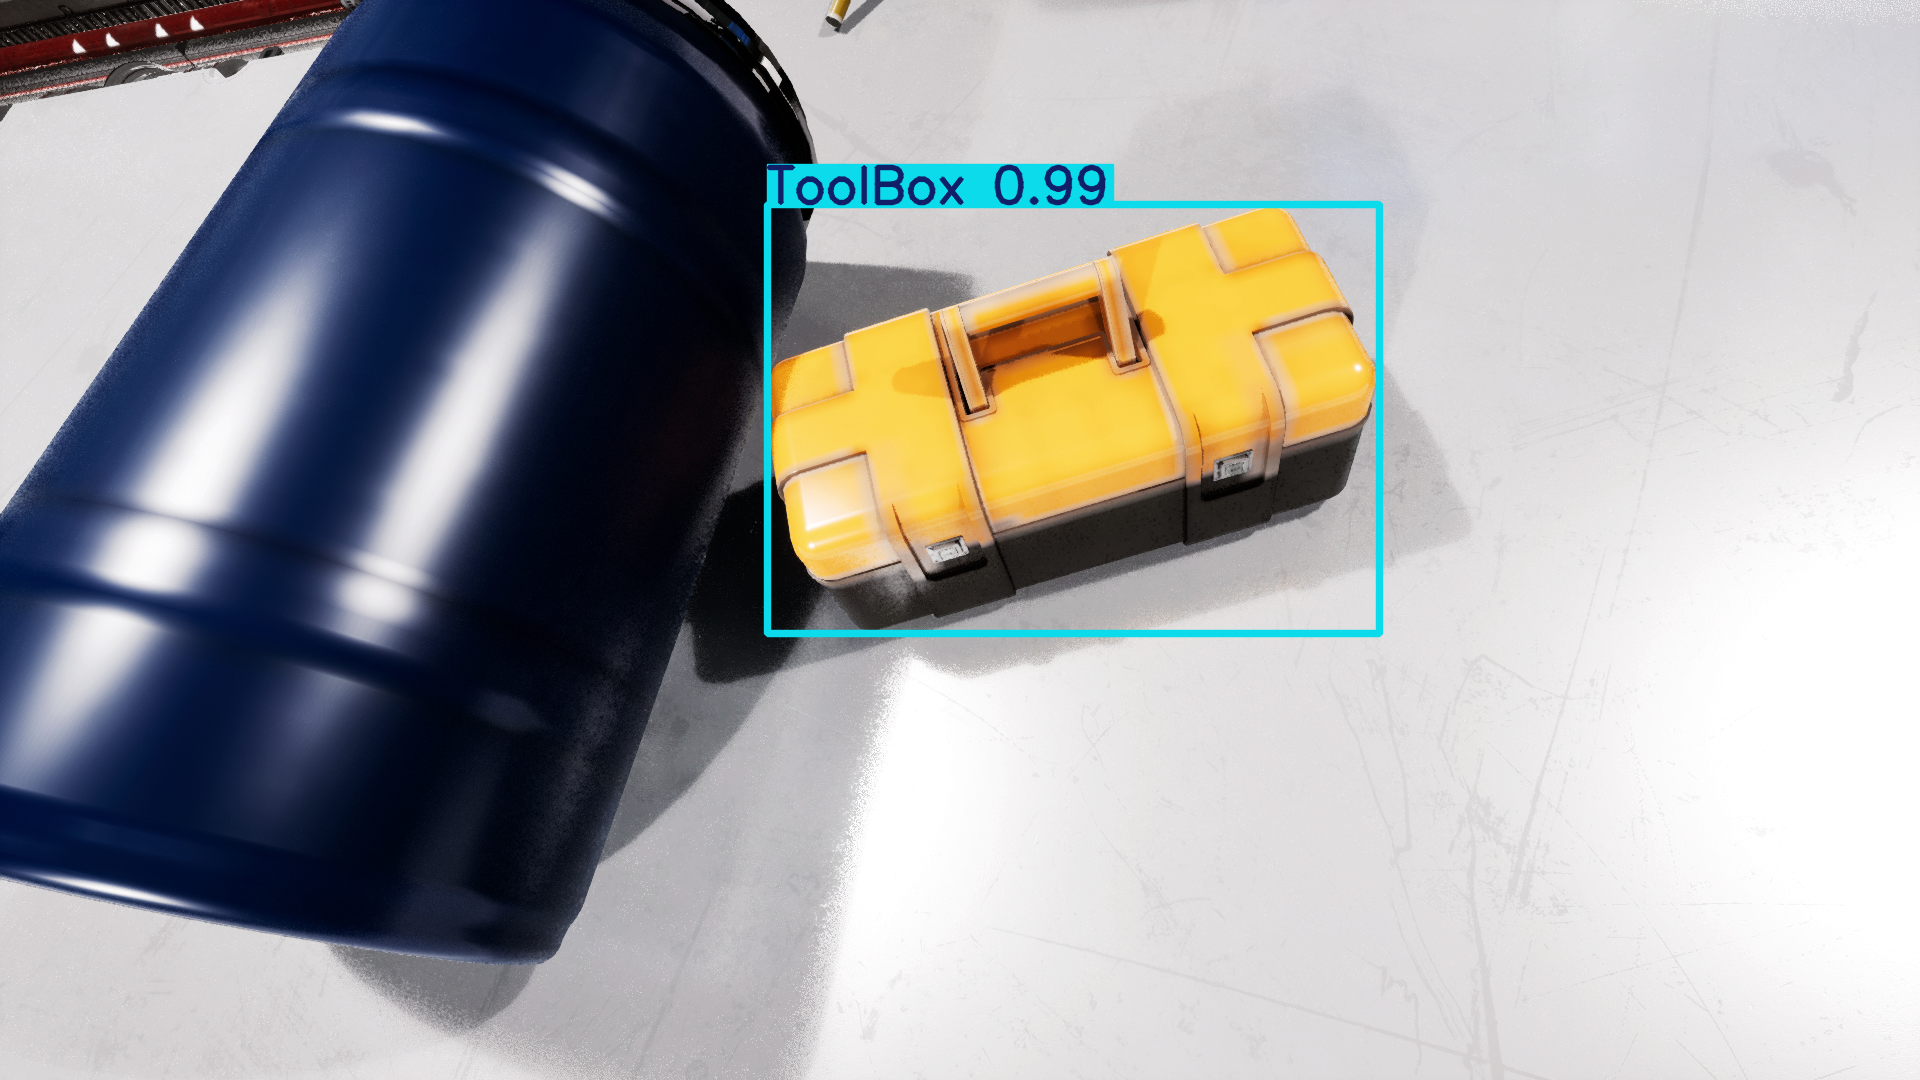

In [27]:
from PIL import Image
from ultralytics import YOLO

# Load the best trained model
model_path = 'runs/train/industrial_safety_colab3/weights/best.pt'
model = YOLO(model_path)

# Define the path to an example test image
test_image_path = '/content/HackByte_Dataset/data/test/images/000000001.png' # Using an existing image file

# Perform prediction
results = model(test_image_path)

# Display the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)